# Carga-de-Datos-y-Exploracion

In [1]:
%load_ext watermark
%watermark

2019-07-12T18:19:43+02:00

CPython 3.6.8
IPython 6.2.1

compiler   : GCC 7.3.0
system     : Linux
release    : 4.13.0-46-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit


## Carga de datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_excel('../Data/Online Retail.xlsx')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## NaN's

In [4]:
len(df)

541909

In [5]:
df[df['CustomerID'].isnull() == True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [6]:
len(df[df['CustomerID'].isnull() == True])

135080

Tenemos 135080 registros de los que no disponemos del CustomerId, y por lo tanto no nos sirven para nuestro estudio. Los eliminamos directamente.

In [7]:
df = df[df['CustomerID'].isnull() == False]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
len(df)

406829

El dataframe, ya con todos los clientes (CustomerId) identificados, tiene 406829 registros.

## Total y Nuevo DataFrame

In [9]:
df['Total'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
df = df.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'Total': lambda x: x.sum()}).reset_index()

df.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [11]:
df.tail()

,InvoiceNo,InvoiceDate,CustomerID,Total
22216,C581484,2011-12-09 09:27:00,16446.0,-168469.60
22217,C581490,2011-12-09 09:57:00,14397.0,-32.53
22218,C581499,2011-12-09 10:28:00,15498.0,-224.69
22219,C581568,2011-12-09 11:57:00,15311.0,-54.75
22220,C581569,2011-12-09 11:58:00,17315.0,-7.50


In [12]:
df.isnull().sum().sum()

0

No hay NaN's en todo el dataframe.

In [13]:
len(df)

22221

In [14]:
len(df['CustomerID'].unique())

4372

In [15]:
print('Disponemos por tanto de {} compras para {} clientes distintos.'.format(
    len(df),
    len(df['CustomerID'].unique())))

Disponemos por tanto de 22221 compras para 4372 clientes distintos.


In [16]:
df['InvoiceDate'] = df['InvoiceDate'].dt.normalize()

df.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01,17850.0,139.12
1,536366,2010-12-01,17850.0,22.20
2,536367,2010-12-01,13047.0,278.73
3,536368,2010-12-01,13047.0,70.05
4,536369,2010-12-01,13047.0,17.85


In [17]:
df = df.sort_values(by = 'InvoiceDate').reset_index(drop = True)

df.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01,17850.0,139.12
1,536567,2010-12-01,16048.0,251.40
2,536566,2010-12-01,16928.0,116.25
3,536564,2010-12-01,13468.0,51.40
4,536563,2010-12-01,17760.0,172.54


In [18]:
df.tail()

,InvoiceNo,InvoiceDate,CustomerID,Total
22216,581494,2011-12-09,12518.0,339.14
22217,581495,2011-12-09,14051.0,1203.90
22218,581496,2011-12-09,16558.0,598.97
22219,581486,2011-12-09,17001.0,407.68
22220,C581569,2011-12-09,17315.0,-7.50


## Visualizaciones

¿Cuánto dinearo se ha facturado por día?

In [19]:
df.dtypes

InvoiceNo              object
InvoiceDate    datetime64[ns]
CustomerID            float64
Total                 float64
dtype: object

In [20]:
df_temp = df.groupby(df['InvoiceDate']).agg({'Total':lambda x: x.sum()}).reset_index()

df_temp.head()

# Variantes:
# df.groupby([df['InvoiceDate'].dt.date]).agg({'Total': lambda x: x.sum()}).reset_index()
# df.groupby([df['InvoiceDate'].dt.date])['Total'].sum().reset_index()

,InvoiceDate,Total
0,2010-12-01,46051.26
1,2010-12-02,45775.43
2,2010-12-03,22598.46
3,2010-12-05,31380.60
4,2010-12-06,30465.08


In [21]:
df_temp.dtypes

InvoiceDate    datetime64[ns]
Total                 float64
dtype: object

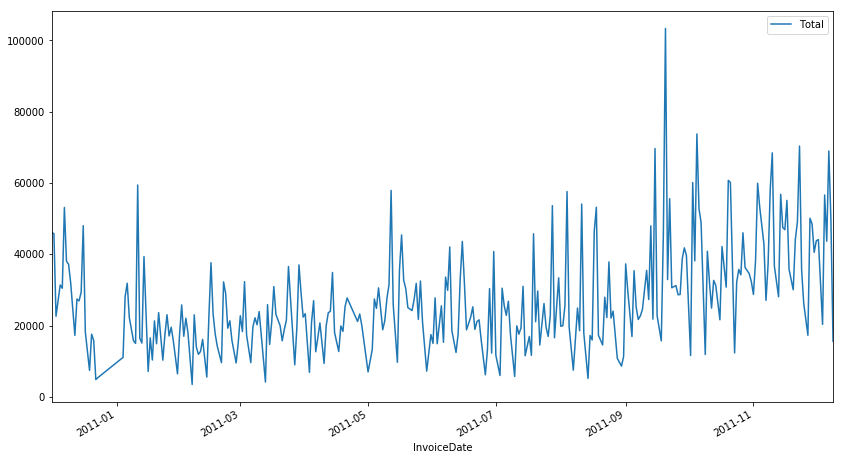

In [22]:
df_temp.plot.line(x = 'InvoiceDate',y = 'Total',figsize = (14,8));

¿Cómo es el comportamiento de 2 clientes cualesquiera?

In [23]:
random_client1 = df.sample(n = 1).iloc[0]['CustomerID']

random_client1

15021.0

In [24]:
df_random_client1 = df[df['CustomerID'] == random_client1]

df_random_client1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
562,C537445,2010-12-07,15021.0,-9.35
655,C537746,2010-12-08,15021.0,-6.65
747,537769,2010-12-08,15021.0,205.64
5266,547498,2011-03-23,15021.0,201.48
5297,C547495,2011-03-23,15021.0,-3.30


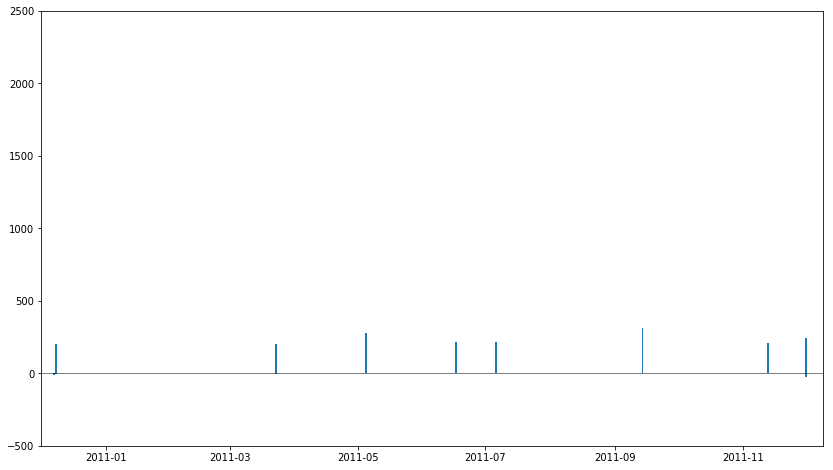

In [25]:
plt.figure(figsize = (14,8))
plt.bar(df_random_client1['InvoiceDate'],df_random_client1['Total'])
plt.xlim(pd.Timestamp('2010-12-01'),pd.Timestamp('2011-12-09'))
plt.ylim(-500,2500)
plt.axhline(0,color = 'black',linewidth = 0.5);

In [26]:
random_client2 = df.sample(n = 1).iloc[0]['CustomerID']

random_client2

12989.0

In [27]:
df_random_client2 = df[df['CustomerID'] == random_client2]

df_random_client2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
937,538306,2010-12-10,12989.0,202.5
2252,541247,2011-01-16,12989.0,810.0
3489,543935,2011-02-14,12989.0,901.6
3715,C544318,2011-02-17,12989.0,-2.1
4980,546847,2011-03-17,12989.0,437.4


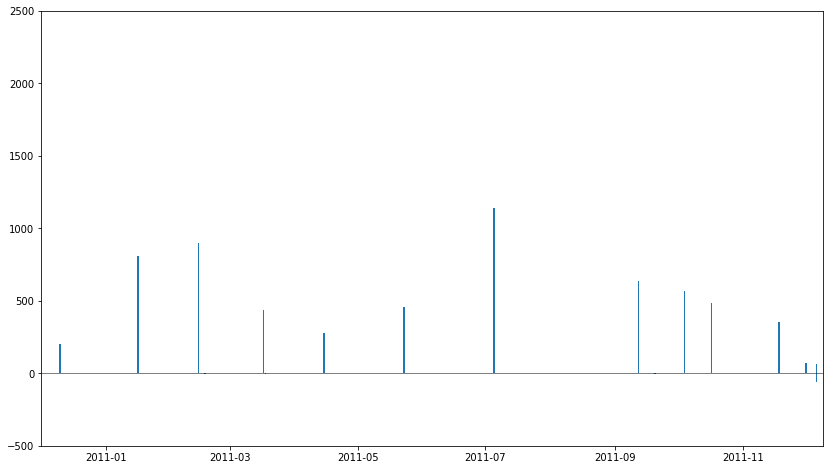

In [28]:
plt.figure(figsize = (14,8))
plt.bar(df_random_client2['InvoiceDate'],df_random_client2['Total'])
plt.xlim(pd.Timestamp('2010-12-01'),pd.Timestamp('2011-12-09'))
plt.ylim(-500,2500)
plt.axhline(0,color = 'black',linewidth = 0.5);

## Creación archivo pkl 

Ordenamos por fecha ('InvoiceDate').

In [29]:
df = df.sort_values(by = 'InvoiceDate').reset_index(drop = True)

df.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01,17850.0,139.12
1,536368,2010-12-01,13047.0,70.05
2,536369,2010-12-01,13047.0,17.85
3,536370,2010-12-01,12583.0,855.86
4,536523,2010-12-01,12868.0,203.30


In [30]:
df.tail()

,InvoiceNo,InvoiceDate,CustomerID,Total
22216,581582,2011-12-09,17581.0,29.88
22217,581583,2011-12-09,13777.0,124.60
22218,581584,2011-12-09,13777.0,140.64
22219,581571,2011-12-09,15311.0,494.60
22220,C581569,2011-12-09,17315.0,-7.50


In [31]:
df.to_pickle('../Data/01.-Carga-de-Datos-y-Exploracion.pkl')

In [32]:
!ls -l --block-size=M ../Data/01.-Carga-de-Datos-y-Exploracion.pkl

-rw-r--r-- 1 dsc dsc 1M jul 12 18:21 ../Data/01.-Carga-de-Datos-y-Exploracion.pkl
